In [128]:
from numpy import zeros, empty,linspace,exp,arange,nan,pi,sin,array
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML


In [2]:
L=1.
d=.1
v=100.
C=1.0
N=100
a=L/N
sigma=0.5

h=1e-6
steps=100000


In [3]:
def f(y):
    res=empty(N+1,float)
    res[1:N]=(y[0:N-1]+y[2:N+1]-2*y[1:N])*(v*v)/(a*a)
    res[0]=res[N]=0
    return(res)

2000 50000 99000


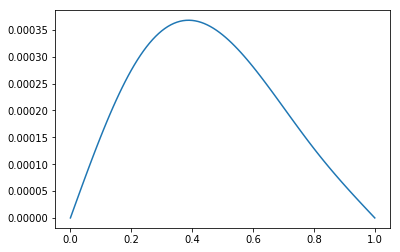

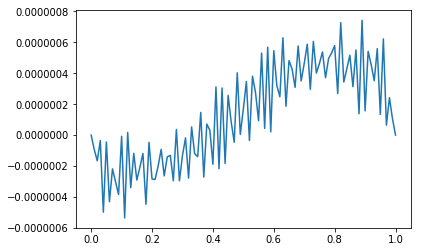

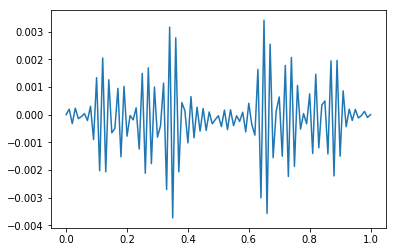

In [11]:
x=linspace(0.0,L,N+1)
psi=zeros(N+1,float)
dpsi=C*x*(L-x)*exp(-(x-d)**2/(2*sigma**2))/(L*L)


k1=int(2/h/1000)
k2=int(50/h/1000)
k3=int(99/h/1000)
print(k1,k2,k3)

for n in range(steps):
    
    psi,dpsi=psi+h*dpsi,dpsi+h*f(psi)
    
    if n==k1 or n==k2 or n==k3:
        plt.plot(x,psi)
    plt.show()


0.85


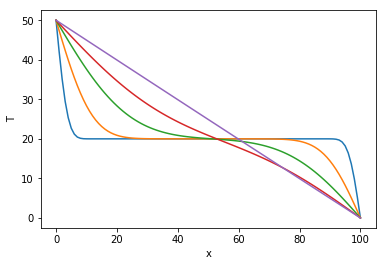

In [142]:

# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-3      # Time-step
epsilon = h/1000

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 50.0    # Hi temperature in Celcius

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon

# Create arrays
T = empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo
tpoints=[]
# Main loop
t = 0.0
c = h*D/(a*a)
print(2*c)
while t<tend:

    # Calculate the new values of T
    Tp[1:N]=T[1:N]+c*(T[0:N-1]+T[2:N+1]-2*T[1:N])
    #for i in range(1,N):
    #T[0]=Thi+20*sin(2*pi*t/4)
    #Tp[0]=Thi+20*sin(2*pi*t/4)
        #Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T,Tp = Tp,T
    t += h
    
    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plot(T)
    if abs(t-t2)<epsilon:
        plot(T)
    if abs(t-t3)<epsilon:
        plot(T)
    if abs(t-t4)<epsilon:
        plot(T)
    if abs(t-t5)<epsilon:
        plot(T)

xlabel("x")
ylabel("T")
show()

In [92]:
L=1.
d=.1
v=100.
C=0.5
N=200
a=L/N
sigma=0.5
h=1e-6
r=h/a
print(r)
steps=100000

k1=int(1/h/1000)
k2=int(50/h/1000)
k3=int(500/h/1000)
print(k1,k2,k3)

0.00019999999999999998
1000 50000 500000


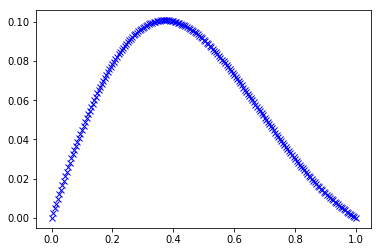

In [93]:
x=linspace(0.0,L,N+1)
u=zeros(steps,float)
f=zeros(N+1,float)
g=C*x*(L-x)*exp(-(x-d)**2/(2*sigma**2))/(L*L)
plt.plot(x,g,"bx")
plt.show()

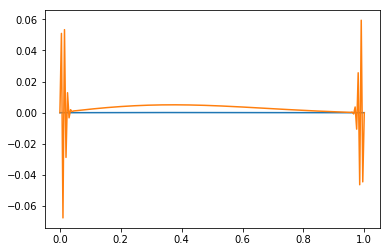

In [94]:
u_future=zeros(N+1,float)
u_now=zeros(N+1,float)
u_past=zeros(N+1,float)

for i in range(1,N):
    u_future[i]=.5*r**2*(u_now[i+1]-2*u_now[i]+u_now[i-1])+h*g[i]+u_now[i]
u_future[0]=0
u_future[N]=0
u_past[:], u_now[:] = u_now, u_future


for n in range(1, steps):
    # Update all inner mesh points at time t[n+1]
    for i in range(1, N):
        u_future[i] = 2*u_now[i] - u_past[i] - r**2*(u_now[i+1] - 2*u_now[i] + u_now[i-1])

    # Insert boundary conditions
    u_future[0] = 0;  u_future[N] = 0

    # Switch variables before next step
    u_past[:], u_now[:] = u_now, u_future
    
    if n==k1 or n==k2 or n==k3:
        plt.plot(x,u_now)
plt.show()

KeyboardInterrupt: 

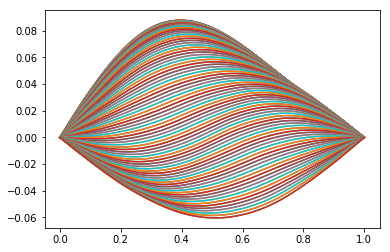

In [113]:
u_future=zeros(N+1,float)
u_now=g
#u_now=zeros(N+1,float)
u_past=zeros(N+1,float)

for i in range(1,N):
    u_future[i]=.5*(r**2*u_now[i+1]+2*(1-r**2)*u_now[i]+r**2*u_now[i-1])#+h*g[i]
u_future[0]=0
u_future[N]=0
u_past[:], u_now[:] = u_now, u_future

for n in range(1000000):
    for i in range(1,N):
        u_future[i]=r**2*u_now[i+1]+2*(1-r**2)*u_now[i]+r**2*u_now[i-1]-u_past[i]
    u_future[0]=0
    u_future[N]=0
    u_past[:], u_now[:]=u_now,u_future
    if n%10000==0:
        plt.plot(x,g)
        plt.plot(x,u_now)
plt.show()

